<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Project & Dataset Overview</div>
    <center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/a/ae/Prefrontal1.png" width="400" style="margin-top: 20px;">
</center>

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Library Load </div>
    <center>
  

In [37]:
library(SpatialExperiment)
library(STexampleData)

In [70]:
library(ggspavis)

In [72]:
library(scater)

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Load data </div>
    <center>

In [27]:
# load object
spe <- Visium_humanDLPFC()

see ?STexampleData and browseVignettes('STexampleData') for documentation

loading from cache



In [13]:
# save object(s)
saveRDS(spe, file = "spe_load.rds")

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'object' in selecting a method for function 'containsOutOfMemoryData': no slot of name "metadata" for this object of class "LoadedSpatialImage"


In [29]:
#check object
spe

class: SpatialExperiment 
dim: 33538 4992 
metadata(0):
assays(1): counts
rownames(33538): ENSG00000243485 ENSG00000237613 ... ENSG00000277475
  ENSG00000268674
rowData names(3): gene_id gene_name feature_type
colnames(4992): AAACAACGAATAGTTC-1 AAACAAGTATCTCCCA-1 ...
  TTGTTTGTATTACACG-1 TTGTTTGTGTAAATTC-1
colData names(8): barcode_id sample_id ... reference cell_count
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):
spatialCoords names(2) : pxl_col_in_fullres pxl_row_in_fullres
imgData names(4): sample_id image_id data scaleFactor

<div style="padding:20px; 
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Quality control </div>
    <center>

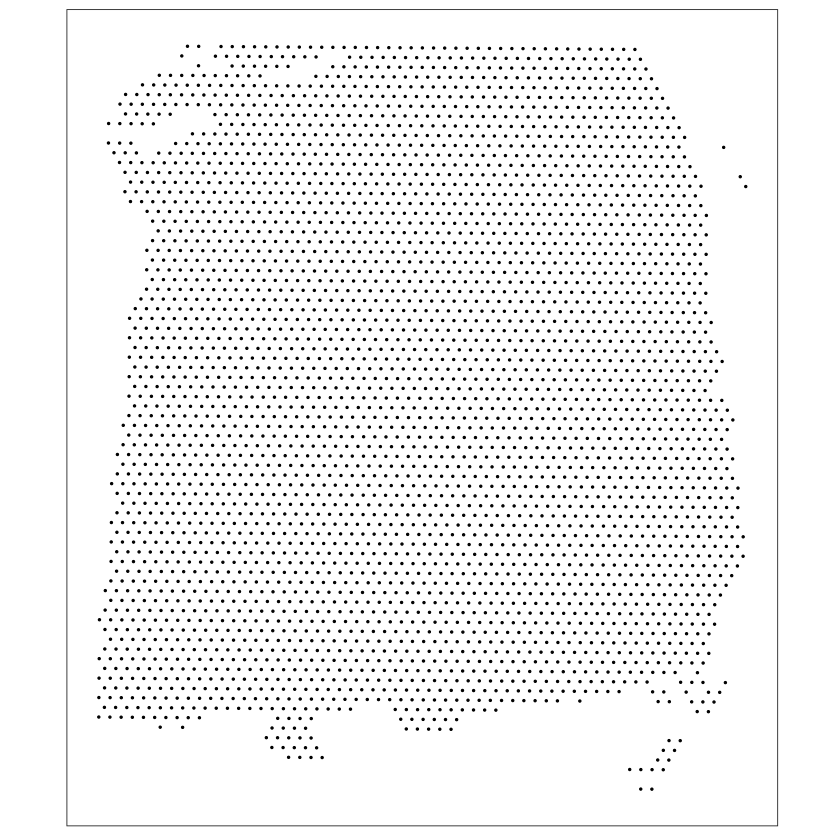

In [31]:
# plot spatial coordinates (spots)
plotSpots(spe)

In [74]:
# subset to keep only spots over tissue
spe <- spe[, colData(spe)$in_tissue == 1]
dim(spe)

[1] 33538  3639

In [76]:
# identify mitochondrial genes
is_mito <- grepl("(^MT-)|(^mt-)", rowData(spe)$gene_name)
table(is_mito)

is_mito
FALSE  TRUE 
33525    13 

In [78]:
rowData(spe)$gene_name[is_mito]

[1] "MT-ND1"  "MT-ND2"  "MT-CO1"  "MT-CO2"  "MT-ATP8" "MT-ATP6" "MT-CO3" 
 [8] "MT-ND3"  "MT-ND4L" "MT-ND4"  "MT-ND5"  "MT-ND6"  "MT-CYB"

In [80]:
# calculate per-spot QC metrics and store in colData
spe <- addPerCellQC(spe, subsets = list(mito = is_mito))
head(colData(spe))

DataFrame with 6 rows and 14 columns
                           barcode_id     sample_id in_tissue array_row
                          <character>   <character> <integer> <integer>
AAACAAGTATCTCCCA-1 AAACAAGTATCTCCCA-1 sample_151673         1        50
AAACAATCTACTAGCA-1 AAACAATCTACTAGCA-1 sample_151673         1         3
AAACACCAATAACTGC-1 AAACACCAATAACTGC-1 sample_151673         1        59
AAACAGAGCGACTCCT-1 AAACAGAGCGACTCCT-1 sample_151673         1        14
AAACAGCTTTCAGAAG-1 AAACAGCTTTCAGAAG-1 sample_151673         1        43
AAACAGGGTCTATATT-1 AAACAGGGTCTATATT-1 sample_151673         1        47
                   array_col ground_truth   reference cell_count       sum
                   <integer>  <character> <character>  <integer> <numeric>
AAACAAGTATCTCCCA-1       102       Layer3      Layer3          6      8458
AAACAATCTACTAGCA-1        43       Layer1      Layer1         16      1667
AAACACCAATAACTGC-1        19           WM          WM          5      3769
AAACAGAGCGAC

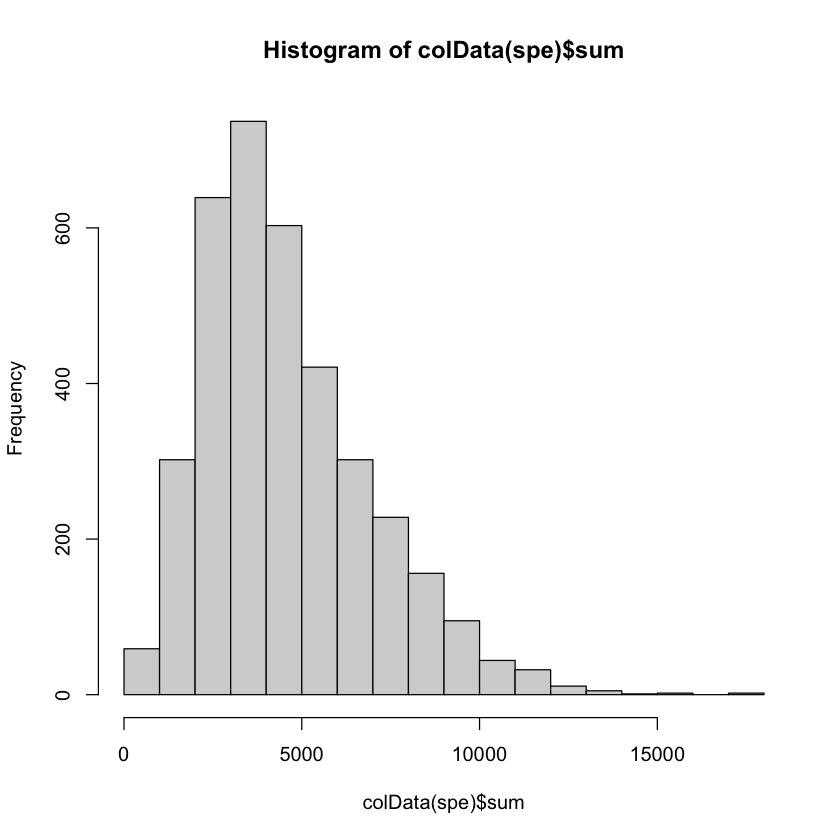

In [82]:
# histogram of library sizes
hist(colData(spe)$sum, breaks = 20)

`geom_smooth()` using
formula = 'y ~ x'
`stat_xsidebin()` using
`bins = 30`. Pick better
value with `binwidth`.
`stat_ysidebin()` using
`bins = 30`. Pick better
value with `binwidth`.


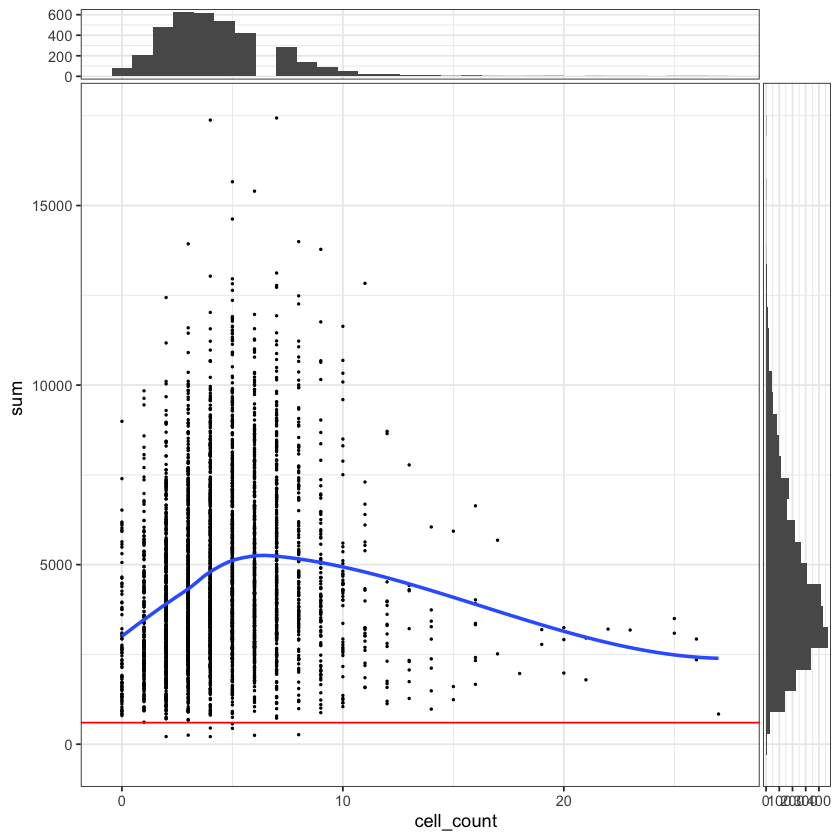

In [84]:
# plot library size vs. number of cells per spot
plotSpotQC(spe, plot_type = "scatter", 
           x_metric = "cell_count", y_metric = "sum", 
           y_threshold = 600)

In [86]:
# select QC threshold for library size
qc_lib_size <- colData(spe)$sum < 600
table(qc_lib_size)

qc_lib_size
FALSE  TRUE 
 3631     8 

In [88]:
colData(spe)$qc_lib_size <- qc_lib_size

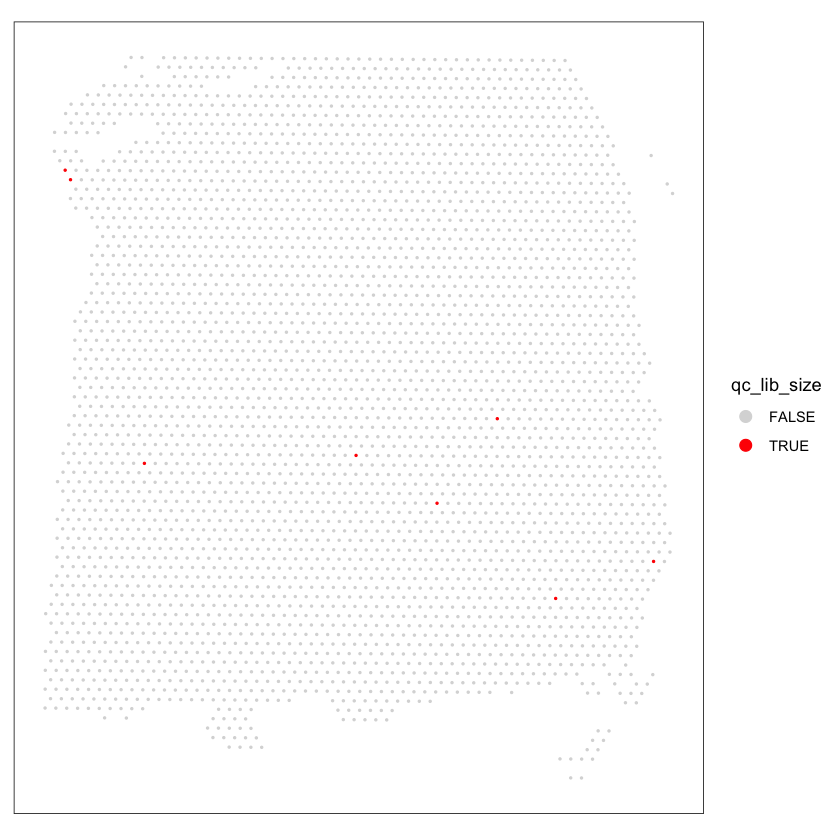

In [90]:
# check spatial pattern of discarded spots
plotSpotQC(spe, plot_type = "spot", 
           annotate = "qc_lib_size")

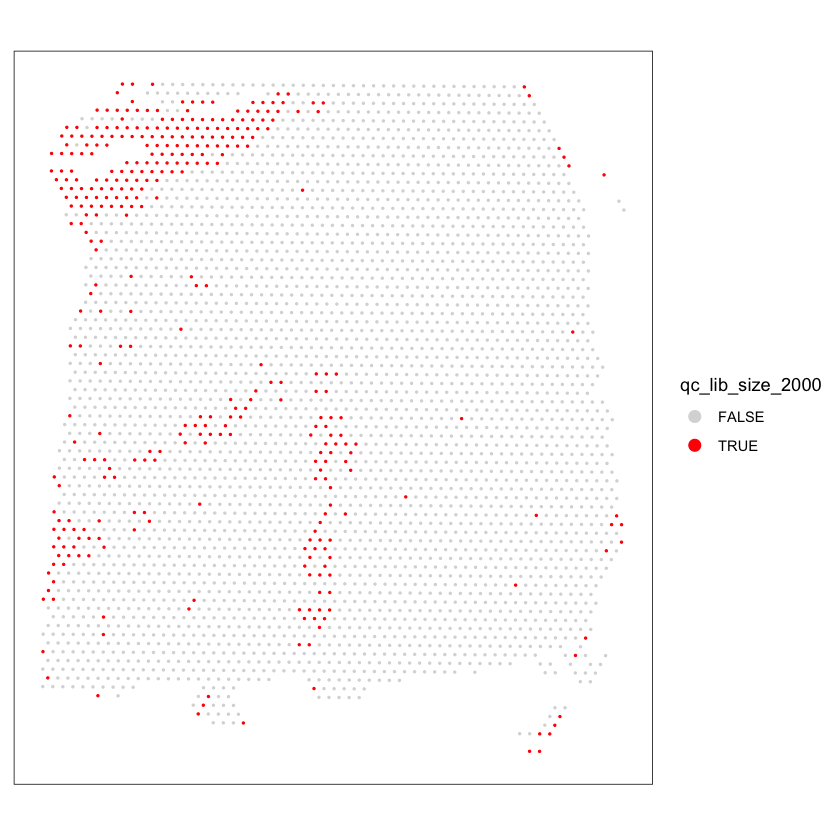

In [92]:
# check spatial pattern of discarded spots if threshold is too high
qc_lib_size_2000 <- colData(spe)$sum < 2000
colData(spe)$qc_lib_size_2000 <- qc_lib_size_2000
plotSpotQC(spe, plot_type = "spot", 
           annotate = "qc_lib_size_2000")

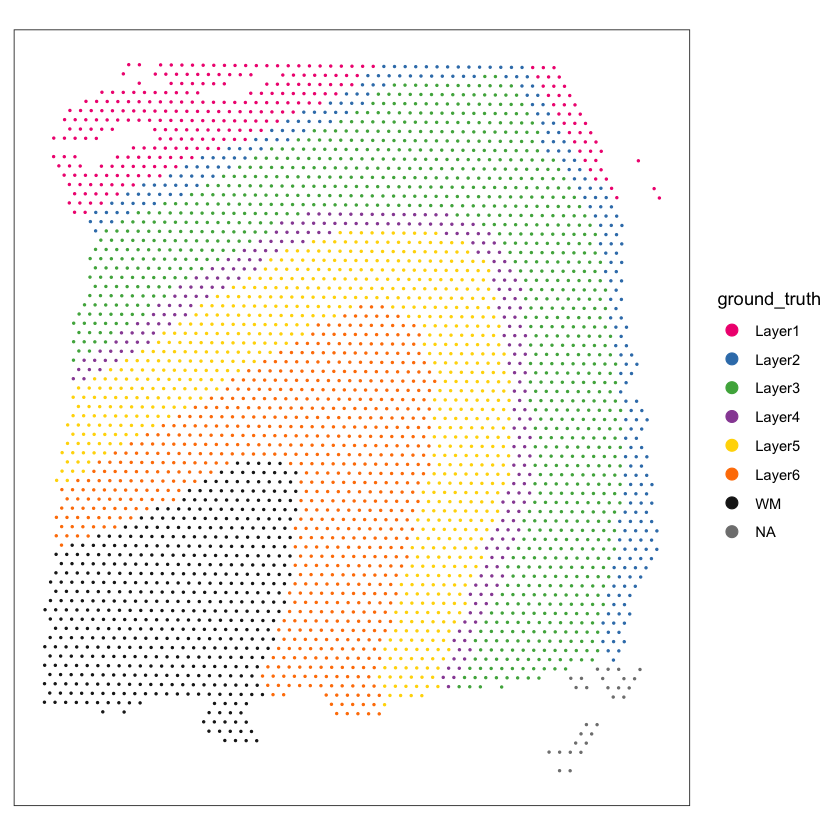

In [94]:
# plot reference (manually annotated) layers
plotSpots(spe, annotate = "ground_truth", 
          pal = "libd_layer_colors")

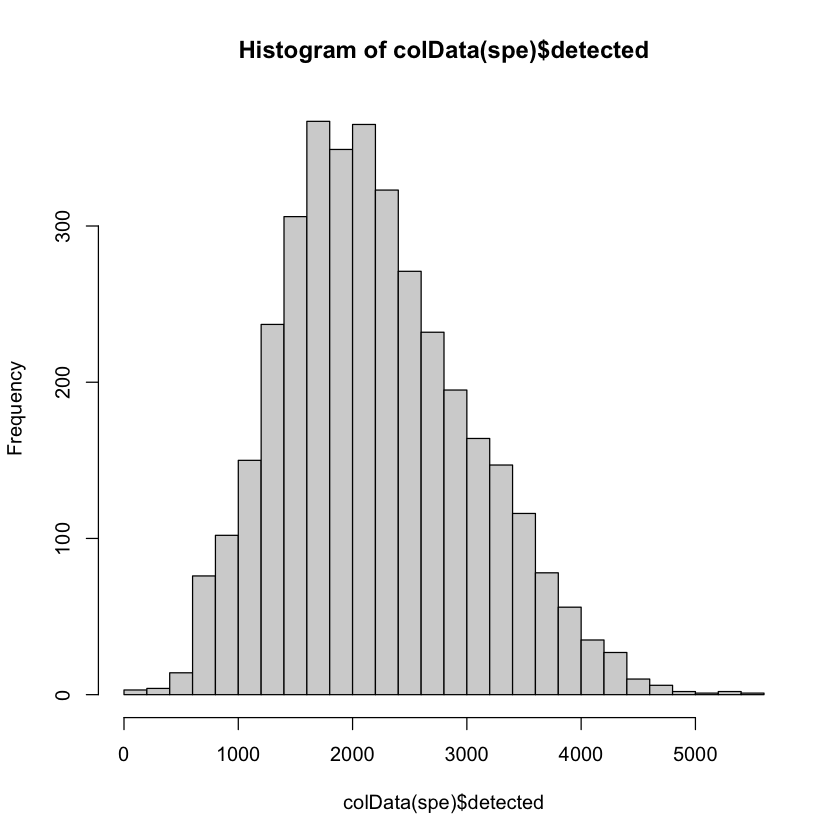

In [96]:
# histogram of numbers of expressed genes
hist(colData(spe)$detected, breaks = 20)

`geom_smooth()` using
formula = 'y ~ x'
`stat_xsidebin()` using
`bins = 30`. Pick better
value with `binwidth`.
`stat_ysidebin()` using
`bins = 30`. Pick better
value with `binwidth`.


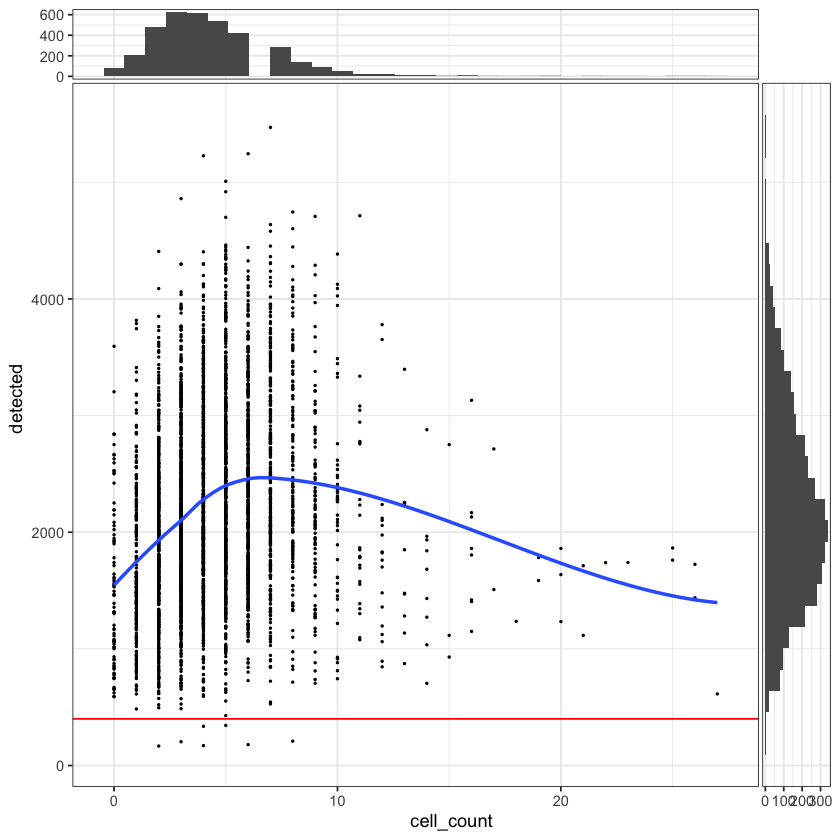

In [98]:
# plot number of expressed genes vs. number of cells per spot
plotSpotQC(spe, plot_type = "scatter", 
           x_metric = "cell_count", y_metric = "detected", 
           y_threshold = 400)

In [100]:
# select QC threshold for number of expressed genes
qc_detected <- colData(spe)$detected < 400
table(qc_detected)

qc_detected
FALSE  TRUE 
 3632     7 

In [102]:
colData(spe)$qc_detected <- qc_detected

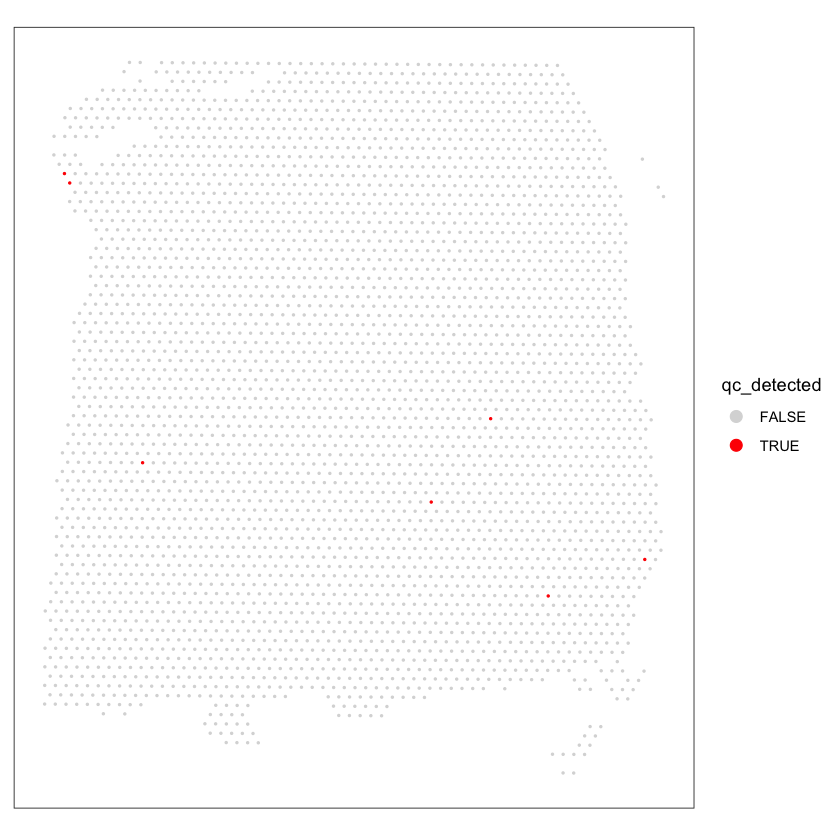

In [104]:
# check spatial pattern of discarded spots
plotSpotQC(spe, plot_type = "spot", 
           annotate = "qc_detected")

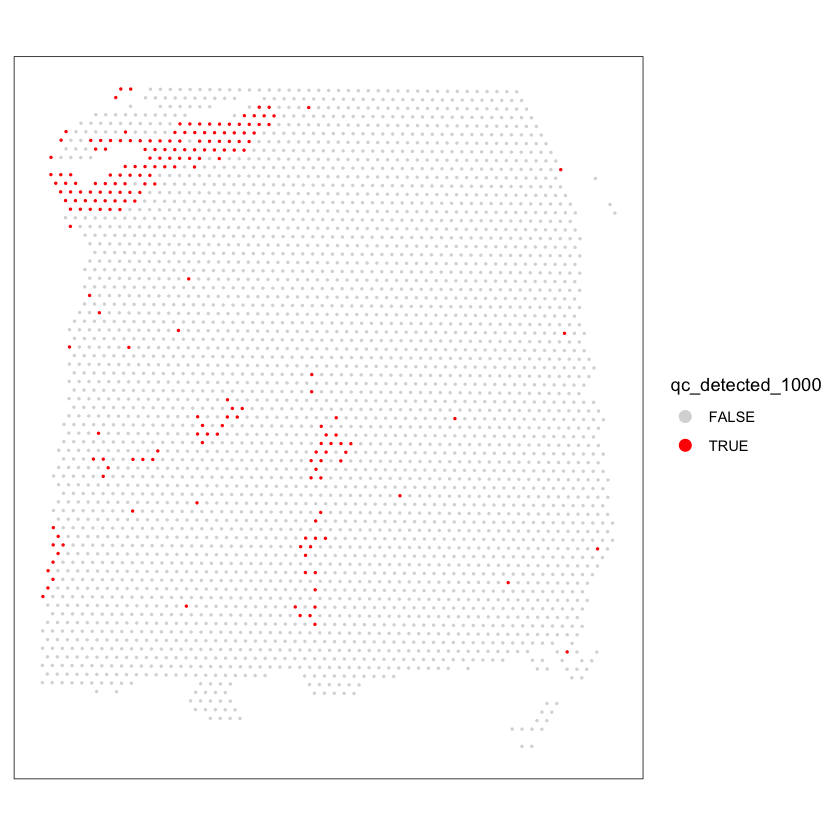

In [106]:
# check spatial pattern of discarded spots if threshold is too high
qc_detected_1000 <- colData(spe)$detected < 1000
colData(spe)$qc_detected_1000 <- qc_detected_1000
plotSpotQC(spe, plot_type = "spot", 
           annotate = "qc_detected_1000")

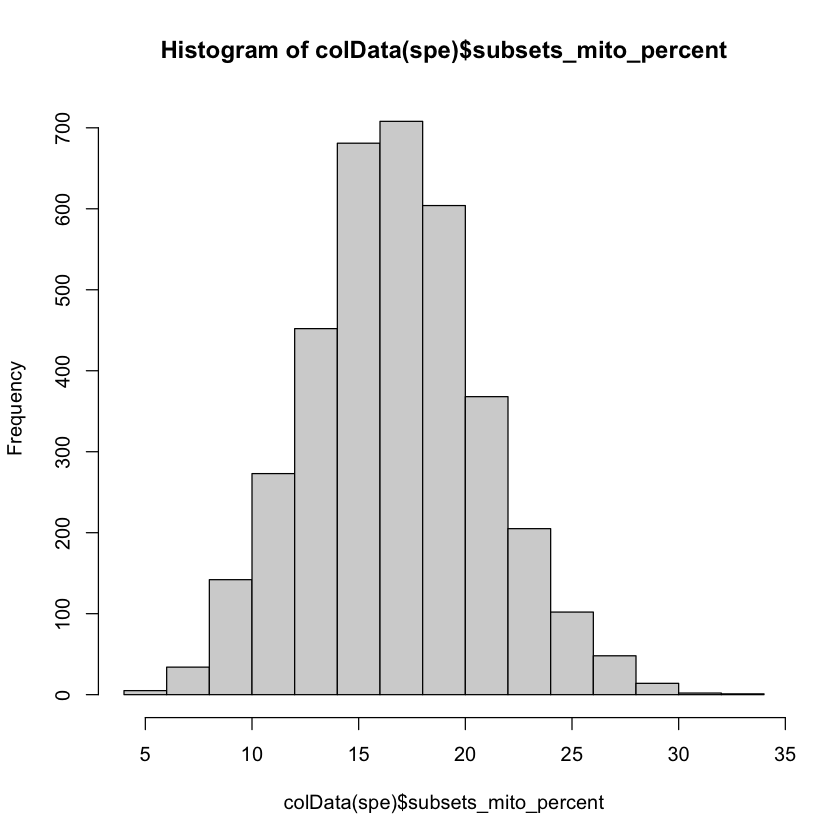

In [108]:
# histogram of mitochondrial read proportions
hist(colData(spe)$subsets_mito_percent, breaks = 20)

`geom_smooth()` using
formula = 'y ~ x'
`stat_xsidebin()` using
`bins = 30`. Pick better
value with `binwidth`.
`stat_ysidebin()` using
`bins = 30`. Pick better
value with `binwidth`.


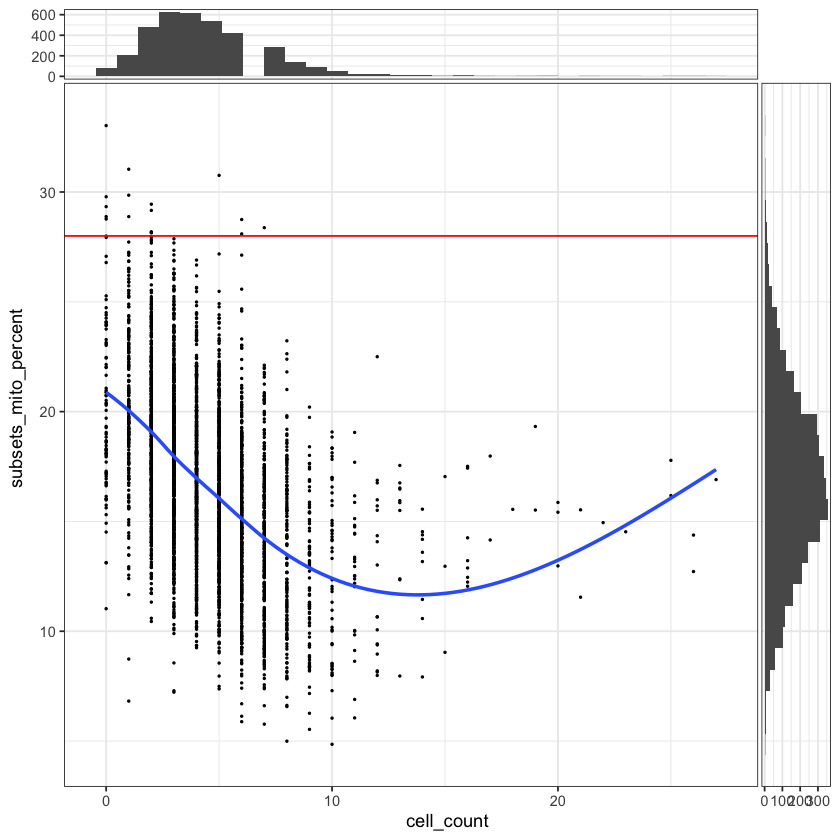

In [110]:
# plot mitochondrial read proportion vs. number of cells per spot
plotSpotQC(spe, plot_type = "scatter", 
           x_metric = "cell_count", y_metric = "subsets_mito_percent", 
           y_threshold = 28)

In [112]:
# select QC threshold for mitochondrial read proportion
qc_mito <- colData(spe)$subsets_mito_percent > 28
table(qc_mito)

qc_mito
FALSE  TRUE 
 3622    17 

In [114]:
colData(spe)$qc_mito <- qc_mito

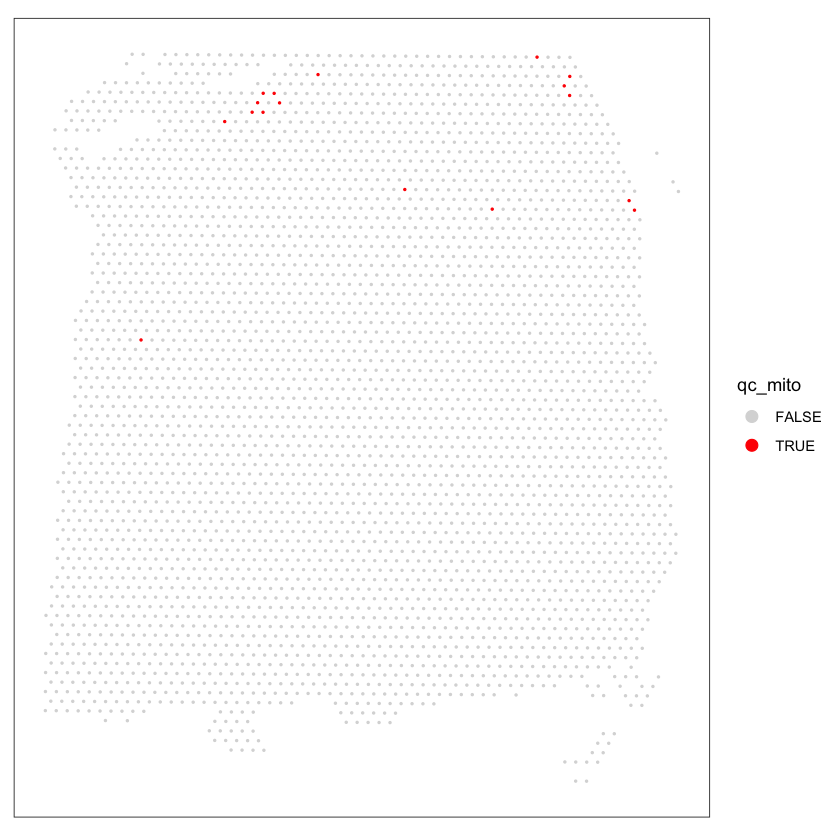

In [116]:
# check spatial pattern of discarded spots
plotSpotQC(spe, plot_type = "spot", 
           annotate = "qc_mito")

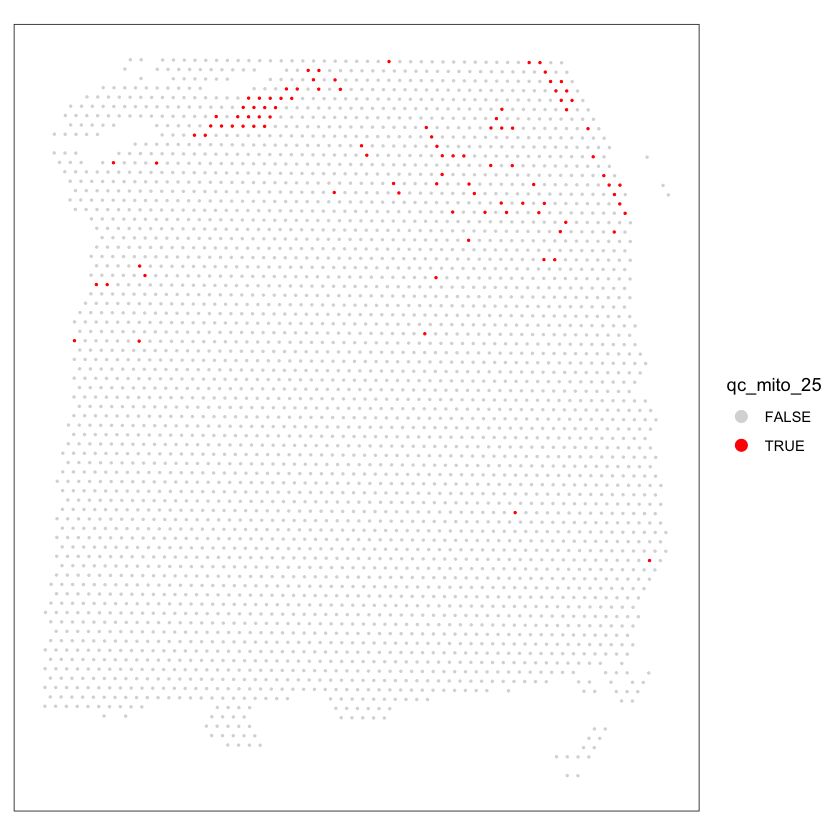

In [118]:
# check spatial pattern of discarded spots if threshold is too high
qc_mito_25 <- colData(spe)$subsets_mito_percent > 25
colData(spe)$qc_mito_25 <- qc_mito_25
plotSpotQC(spe, plot_type = "spot", 
           annotate = "qc_mito_25")

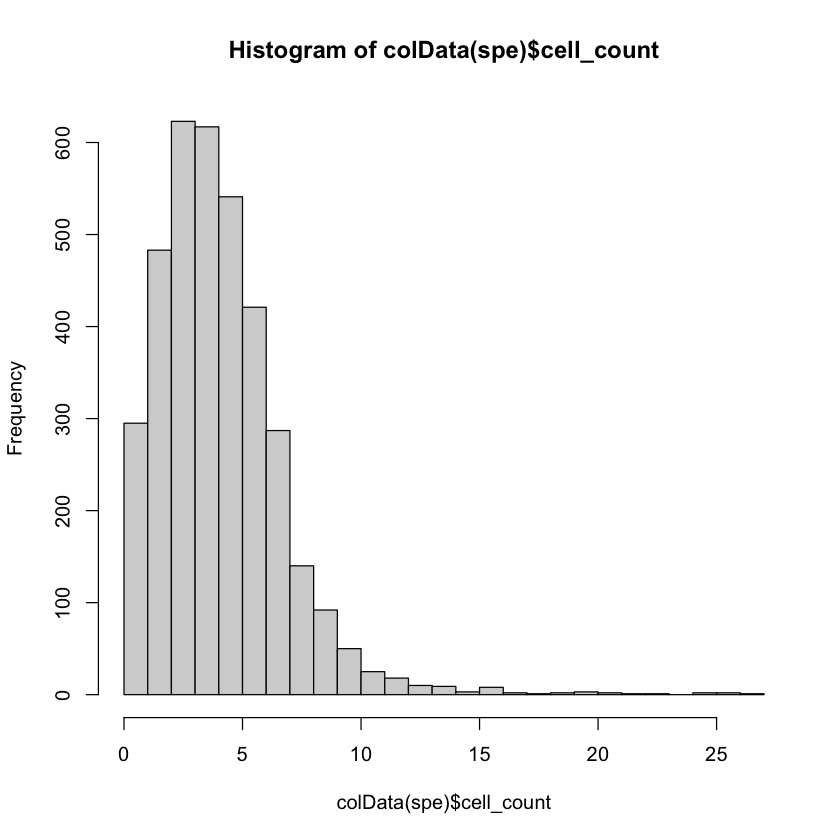

In [120]:
# histogram of cell counts
hist(colData(spe)$cell_count, breaks = 20)

In [122]:
# distribution of cells per spot
tbl_cells_per_spot <- table(colData(spe)$cell_count)

`geom_smooth()` using
formula = 'y ~ x'
`stat_xsidebin()` using
`bins = 30`. Pick better
value with `binwidth`.
`stat_ysidebin()` using
`bins = 30`. Pick better
value with `binwidth`.


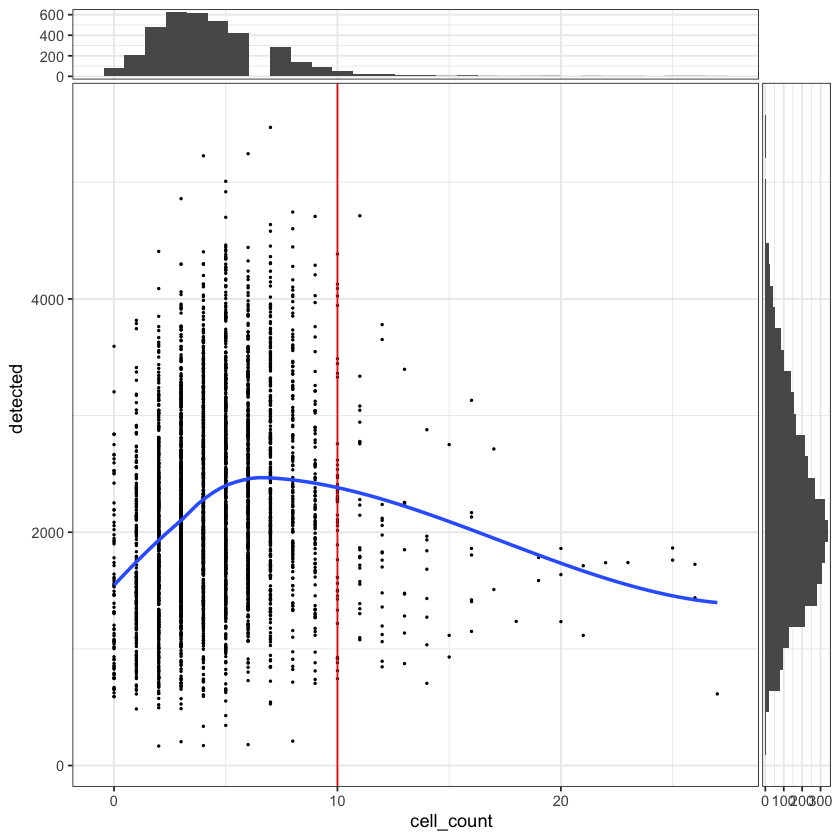

In [124]:
# plot number of expressed genes vs. number of cells per spot
plotSpotQC(spe, plot_type = "scatter", 
           x_metric = "cell_count", y_metric = "detected", 
           x_threshold = 10)

In [126]:
# select QC threshold for number of cells per spot
qc_cell_count <- colData(spe)$cell_count > 10
table(qc_cell_count)

qc_cell_count
FALSE  TRUE 
 3549    90 

In [128]:
colData(spe)$qc_cell_count <- qc_cell_count

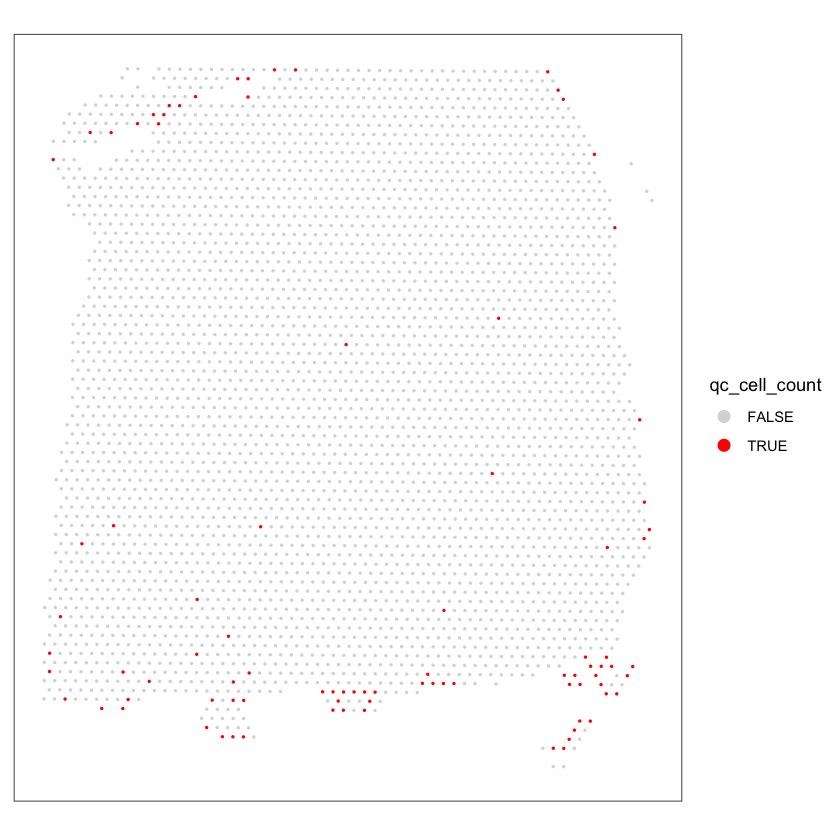

In [130]:
# check spatial pattern of discarded spots
plotSpotQC(spe, plot_type = "spot", 
           annotate = "qc_cell_count")

In [132]:
# number of discarded spots for each metric
apply(cbind(qc_lib_size, qc_detected, qc_mito, qc_cell_count), 2, sum)

qc_lib_size   qc_detected       qc_mito qc_cell_count 
            8             7            17            90

In [134]:
# combined set of discarded spots
discard <- qc_lib_size | qc_detected | qc_mito | qc_cell_count
table(discard)

discard
FALSE  TRUE 
 3524   115 

In [136]:
# store in object
colData(spe)$discard <- discard

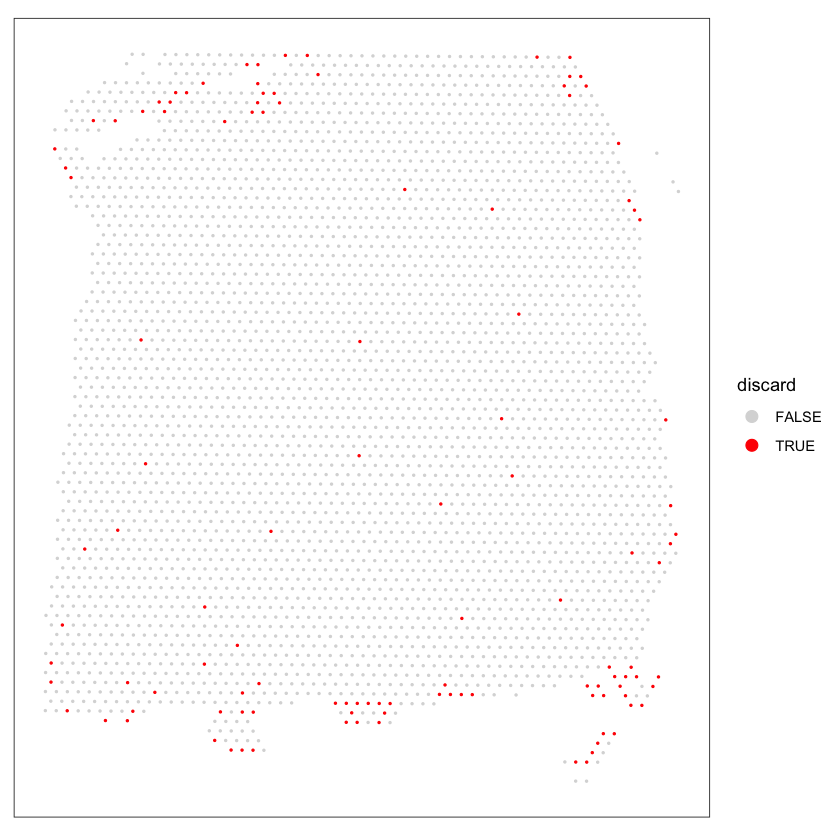

In [138]:
# check spatial pattern of combined set of discarded spots
plotSpotQC(spe, plot_type = "spot", 
           annotate = "discard")

In [140]:
# remove combined set of low-quality spots
spe <- spe[, !colData(spe)$discard]
dim(spe)

[1] 33538  3524

In [142]:
# distribution of cells per spot
tbl_cells_per_spot[1:13]


  0   1   2   3   4   5   6   7   8   9  10  11  12 
 84 211 483 623 617 541 421 287 140  92  50  25  18 

In [144]:
# as proportions
prop_cells_per_spot <- round(tbl_cells_per_spot / sum(tbl_cells_per_spot), 2)
prop_cells_per_spot[1:13]


   0    1    2    3    4    5    6    7    8    9   10   11   12 
0.02 0.06 0.13 0.17 0.17 0.15 0.12 0.08 0.04 0.03 0.01 0.01 0.00 

In [148]:
# save object(s)
saveRDS(spe, file = "spe_qc.rds")

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'object' in selecting a method for function 'containsOutOfMemoryData': no slot of name "metadata" for this object of class "LoadedSpatialImage"
